<a href="https://colab.research.google.com/github/Tech-Wizz/BOTMSU/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contrubitors: Lauren Helbling, Zach Wadhams, Kruize Christensen

# Problem 1: Forest Fires

> The Forest Fires data set was used to predict the burned area of forest fires in the northeast region of Portugal. This data set was upload by Paulo Cortez and Aníbal Morais from the Department of Information Systems at the University of Minho based in Portugal. It contains 11 numerical attributes: X-axis coordinate,Y-axis coordinate, FFMC index, DMC index, DC index, ISI index, temperature, relative humidity (RH), wind speed, outside rain, and	burned area. It also contains 2 categorical attributes: month and day. These values should be label-encoded rather than one-hot-encoded because the attributes range greatly and finding a mean value would have a numerical interpretation. In total, it contains 517 entities and does not have any missing values. This data set is interesting to us because Montana experiences many forest fires every summer and we have always wondered how they calculate the estimated burned area. Specifically, we are interested in looking at how the wind speed and relative humidity relate to burn areas.

# Problem 2: Custom Python Functions

##A function that will compute the mean of a numerical, multidimensional data set input as a 2-dimensional numpy array:

In [ ]:
def multiMean(array):
  n = array.shape[0]
  attributes = array.shape[1]
  result = np.zeros(attributes)
  for i in range(attributes):
    mean = np.sum(array[:,i])/n
    result[i]= mean
  return result

##A function that will compute the estimated covariance between two attributes that are input as one-dimensional numpy vectors:

In [ ]:
def covariance(a,b):
  n = a.shape[0]
  meanA = np.mean(a)
  meanB = np.mean(b)
  sum = 0
  for i in range(n):
    sum = sum + (a[i] - meanA)*(b[i] - meanB)
  result = (1/(n-1))*(sum)
  return result

##A function that will compute the correlation between two attributes that are input as two numpy vectors.

In [ ]:
def variance(v):
  n = v.shape[0]
  mean = np.mean(v)
  sum = 0
  for i in range(n):
    sum = sum + ((v[i]-mean)**2)
  result = sum/(n-1)
  return result

In [ ]:
def coorelation(a,b):
  cov = covariance(a,b)
  stdA = math.sqrt(variance(a))
  stdB = math.sqrt(variance(b))
  coor = cov/(stdA*stdB)
  return coor

##A function that will normalize the attributes in a two-dimensional numpy array using range normalization.

In [ ]:
def rangeNorm(array):
  result = np.zeros(array.shape)
  for i in range(array.shape[1]):
    column = array[:,i]
    min = np.min(column)
    max = np.max(column)
    for j in range(array.shape[0]):
      result[j,i] = (array[j,i]-min)/(max-min)
  return result

##A function that will normalize the attributes in a two-dimensional numpy array using standard normalization.

In [ ]:
def standardNorm(array):
  result = np.zeros(array.shape)
  for i in range(array.shape[1]):
    column = array[:,i]
    mean = np.mean(column)
    std = math.sqrt(variance(column))
    for j in range(array.shape[0]):
      result[j,i] = (array[j,i]-mean)/(std)
  return result

##A function that will compute the covariance matrix of a data set.

In [ ]:
def covarianceMatrix(array):
  n = array.shape[1]
  result = np.zeros((n,n));
  for i in range(n):
    column = array[:,i]
    for j in range(n):
      if(i==j):
        result[j,i]= variance(column)
      else:
        result[j,i] = covariance(column, array[:,j])
  return result

##A function that will label-encode a two-dimensional categorical data array that is passed in as input.
    

In [ ]:
def labelEncode(array):
  for i in range(array.shape[1]):
    column = array[:,i]
    unique = np.unique(column)
    for j in range(array.shape[0]):
      label = np.where(unique == array[j][i])[0][0]
      if isinstance(array[j][i], str):
          array[j][i] = label
  result = array
  return result

# Problem 3: Analyzing Burn Areas

##Convert all categorical attributes using label encoding or one-hot-encoding

Import real data and convert to numpy array:


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('forestfires.csv')
array = df.to_numpy()
print(array)

Saving forestfires.csv to forestfires.csv
[[7 5 'mar' ... 6.7 0.0 0.0]
 [7 4 'oct' ... 0.9 0.0 0.0]
 [7 4 'oct' ... 1.3 0.0 0.0]
 ...
 [7 4 'aug' ... 6.7 0.0 11.16]
 [1 4 'aug' ... 4.0 0.0 0.0]
 [6 3 'nov' ... 4.5 0.0 0.0]]


Label-encoded Dataframe:

In [ ]:
import numpy as np
fires = labelEncode(array)
print(fires)

[[7 5 7 ... 6.7 0.0 0.0]
 [7 4 10 ... 0.9 0.0 0.0]
 [7 4 10 ... 1.3 0.0 0.0]
 ...
 [7 4 1 ... 6.7 0.0 11.16]
 [1 4 1 ... 4.0 0.0 0.0]
 [6 3 9 ... 4.5 0.0 0.0]]


##If your data has missing values, fill in those values with the attribute mean.

This data has no missing values, or else we would replace them at this point in our analysis.

##What is the multidimensional mean of the numerical data matrix (where categorical data have been converted to numerical values)?

In [ ]:
multiMean(fires)

array([4.66924565e+00, 4.29980658e+00, 5.75822050e+00, 2.73694391e+00,
       9.06446809e+01, 1.10872340e+02, 5.47940039e+02, 9.02166344e+00,
       1.88891683e+01, 4.42882012e+01, 4.01760155e+00, 2.16634429e-02,
       1.28472921e+01])

##What is the covariance matrix of the numerical data matrix (where categorical data have been converted to numerical values)?

In [ ]:
np.set_printoptions(suppress=True) #supress scientific notation
np.around(covarianceMatrix(fires), decimals=2) #round to 2 decimals for readability

array([[    5.35,     1.54,    -0.18,    -0.04,    -0.27,    -7.17,
          -49.31,     0.07,    -0.69,     3.22,     0.08,     0.04,
            9.34],
       [    1.54,     1.51,    -0.33,     0.07,    -0.31,     0.61,
          -30.87,    -0.14,    -0.17,     1.25,    -0.04,     0.01,
            3.51],
       [   -0.18,    -0.33,    19.7 ,    -0.71,    -0.18,   -48.5 ,
          238.06,    -3.43,    -1.87,    -7.28,    -1.11,    -0.1 ,
            8.64],
       [   -0.04,     0.07,    -0.71,     4.25,     0.8 ,     8.66,
           28.05,     1.03,     1.66,    -3.25,    -0.12,     0.03,
            2.32],
       [   -0.27,    -0.31,    -0.18,     0.8 ,    30.47,   135.27,
          452.59,    13.38,    13.83,   -27.11,    -0.28,     0.09,
           14.1 ],
       [   -7.17,     0.61,   -48.5 ,     8.66,   135.27,  4101.95,
        10838.5 ,    89.1 ,   174.64,    77.12,   -12.09,     1.42,
          297.59],
       [  -49.31,   -30.87,   238.06,    28.05,   452.59, 10838.5 ,
  

##Choose 5 pairs of attributes that you think could be related. Create scatter plots of all 5 pairs and include these in your report, along with a description and analysis that summarizes why these pairs of attributes might be related, and how the scatter plots do or do not support this intuition.

> Plot 1: X and Y coordinates

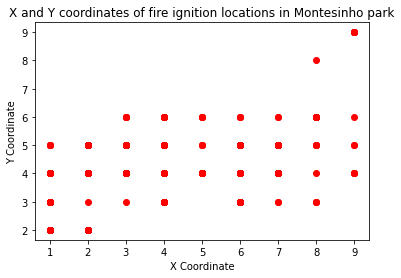

In [ ]:
#months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
##Complete - Zach
import matplotlib.pyplot as plt
plt.scatter(array[:,0], array[:,1], c = "red") #scatterplot of x and y coordinates
plt.title("X and Y coordinates of fire ignition locations in Montesinho park")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

The above plot shows essentially and X Y coordinate graph of the different fire ignition locations in Montesinho park in northern Portugal. The two attributes are most likely related because they tell exactly where a fire started. Notably, we can see that fires rarely start above a Y coordiate of 6. This could potentially be becaue the northern region of the park has different, or alack thereof, vegitation that makes it more difficult for fires to start there. 

> Plot 2: Temperature vs. Relative Humidity

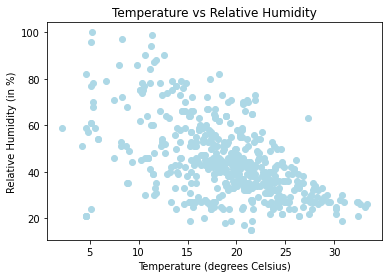

In [ ]:
#Complete -Zach
plt.scatter(array[:,8], array[:,9], c = "lightblue") #scatterplot of temperature and humidity
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Temperature (degrees Celsius)")
plt.ylabel("Relative Humidity (in %)")
plt.show()

The above plot shows the temperature when compared to relative humidity in Montesinho park. We would expect these two atributes to be related because typically, when temperature increases, relative humidity often decreases. This scatter plot clearly supports that because there is a downward trend which shows relative humidity decreasing when the temperature increases.

> Plot 3: Wind vs. Actual Area Burned

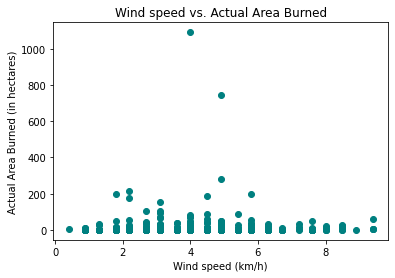

In [ ]:
#Complete -Zach
plt.scatter(array[:,10], array[:,12], c = "teal") #scatterplot of wind speed and area burned
plt.title("Wind speed vs. Actual Area Burned")
plt.xlabel("Wind speed (km/h)")
plt.ylabel("Actual Area Burned (in hectares)")
plt.show()

In plot 3, we compare the average wind speed during a fire to its total area burned in hectares. We would expect based on how wind and fire react for the area burned to increase as the wind speed increases. In this plot however, we do not see that. Excluding some outliers, the area burned stays relatively similar and even appears to slightly decrease as the wind speeds reach above 8 kilometers per hour. most likely, this is because we do not have any fire data that has wind speeds above 9.4 kilometers per hour. If the wind was significantly more, possibly in the 20-30 kilometer per hour range we might see an increase in the area burned by those fires.

>Plot 4: Relative Humidity vs. Actual Area Burned

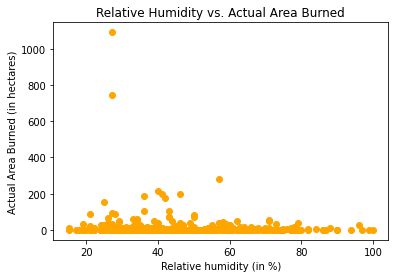

In [ ]:
#Complete -Zach
plt.scatter(array[:,9], array[:,12], c = "orange") #scatterplot of humidity and area burned
plt.title("Relative Humidity vs. Actual Area Burned")
plt.xlabel("Relative humidity (in %)")
plt.ylabel("Actual Area Burned (in hectares)")
plt.show()

For plot 4, we compared the Relative Humidity during a fire to the actual area that fire burned. We would expect that a lower Relative Humidity would allot fires to more easily start and burn hotter and longer. The scatter plot shows that more fires start at a lower humidity because there is a higher concentration of fires at the lower end with some of them having burned a larger area than at the high humidity range. We also see an increase in burned area at lower humidity.

>Plot 5: Drought Code vs Initial Spread Index


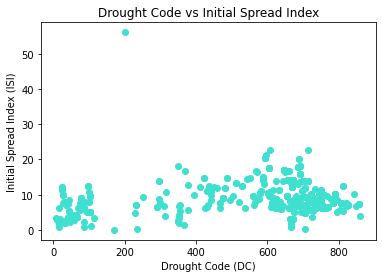

In [ ]:
#Complete -Zach
plt.scatter(array[:,6], array[:,7], c = "turquoise") #scatterplot of humidity and area burned
plt.title("Drought Code vs Initial Spread Index")
plt.xlabel("Drought Code (DC)")
plt.ylabel("Initial Spread Index (ISI)")
plt.show()

For plot 5, we looked at two different metrics that are used to determine and predict the severity of a wildfire. The first of these is the Drought Code (DC)which is used to indicate how dry the surrounding landscape is. It has no units and has a maximum value of 1000 with values of 800 and above indicating severe drought. The second metric is the Initial Spread Index (ISI) which combines fuel dryness and windspeed to estimate the spread potential. It also has no units but is open ended. We would expect as the DC increased, the ISI would also increase. From this plot, we can see that there is a very slight increase in the average ISI when the DC increases but it isn't enough to conclude that for sure. 

##Which range-normalized numerical attributes have the greatest estimated covariance? What is their estimated covariance? Create a scatter plot of these range-normalized attributes.

x have the greatest correlation. Their correlation is 

In [ ]:
covariance(a,b)

NameError: ignored

##Which Z-score-normalized numerical attributes have the smallest correlation? What is their correlation? Create a scatter plot of these Z-score-normalized attributes.

x have the smallest correlation. Their correlation is 

In [ ]:
correlation(a,b)

##How many pairs of features have correlation greater than or equal to 0.5?

x pairs of features have correlation greater than or equal to 0.5.

In [ ]:
correlation(a,b)

##How many pairs of features have negative estimated covariance?




x pairs of features have negative estimated covariance. 

In [ ]:
correlation(a,b)

##What is the total variance of the data?

The total variance of the data is

In [ ]:
variance(fires)

##What is the total variance of the data, restricted to the five features that have the greatest estimated variance?

The total variance of the data restricted to the five features that have the greatest estimated variance is

In [ ]:
variance(fires)